<a href="https://colab.research.google.com/github/FranciniSantana/Data-Analysis-With-Python-FreeCodeCamp/blob/main/2_1_Lendo_Tabela_Via_Arquivo_CSV_no_Google_Drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
pd.read_csv?


In [17]:
from google.colab import drive #importando da biblioteca do google colab a função drive para conseguir ler a tabela que eu subir no meu drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df_dados = pd.read_csv('/content/drive/MyDrive/btc-market-price.csv') #usando uma função do pandas consigo ler esse arquivo de exemplo que subi no meu drive na pasta principal MyDrive


In [19]:
df_dados.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [20]:
df_dados = pd.read_csv('/content/drive/MyDrive/btc-market-price.csv',header=None) #usei o parametro header None para tirar a primeira linha do cabeçalho q por padrão foi colocado na tabela acima
df_dados.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [21]:
df_dados = pd.read_csv('/content/drive/MyDrive/btc-market-price.csv',header=None, names= ['Timestamp','Price']) #usei o parametro name para dar um nome a coluna
df_dados.head()


,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [22]:
df= df_dados

In [23]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [24]:
from pandas.core.computation.pytables import Timestamp # como trabalho muito com datas já transformei o objeto do tipo string para datatime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [25]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [26]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

Usando a biblioteca OS para ler os dados do drive_____

In [27]:
import os
path = "/content/drive/MyDrive/ESTUDO"
fnames = os.listdir(path)
print(fnames)

#pelo stak overflow descobri uma outra forma de ler um documento dentro do drive pela posição dentro de uma outra pasta localizada no MyDrive. Preciso entender melhor se é eficaz pq em ambiente colaborativo alguém pode excluir um arquivo e alterar essa ordem né?
#https://stackoverflow.com/questions/68283589/file-in-google-drive-mounted-as-directory-in-collab

['ASSUNTOS - ESTUDO.gdoc', '🤖 FB HELP CENTER.gdoc', 'ECOMMERCE', 'olist_orders_dataset.csv', 'Spredsheet Google - Udemy', 'olist_sellers_dataset.csv', 'eth-price.csv']


In [30]:
df2 = pd.read_csv(os.path.join(path, fnames[6]))

In [31]:
df2.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


___

In [32]:
df = pd.read_csv(  #Aqui estou testando um outro dataset com o mesmo caminho do primeiro jeito
    '/content/drive/MyDrive/ESTUDO/olist_orders_dataset.csv',
    sep=',',
    header='infer',
    parse_dates=True)

In [33]:
df['order_purchase_timestamp'].head()

0    2017-10-02 10:56:33
1    2018-07-24 20:41:37
2    2018-08-08 08:38:49
3    2017-11-18 19:28:06
4    2018-02-13 21:18:39
Name: order_purchase_timestamp, dtype: object

In [34]:
df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [37]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [35]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


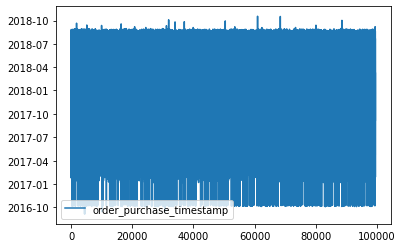

In [38]:
df.plot() # aqui foi uma tentativa frustrada de usar o plot q aprendi em uma aula anterior kkkkk só pra testar. Vou me aprofundar mais depois daqui.
